In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape


(60000, 785)

In [5]:
  df.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [6]:
data=df.values
data


array([[5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [7]:

X=data[:,1:]

In [8]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
Y=data[:,0]

In [10]:
Y

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [11]:
X.shape


(60000, 784)

In [12]:
Y.shape

(60000,)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [15]:
x_train.shape

(48000, 784)

In [16]:
x_test.shape

(12000, 784)

0


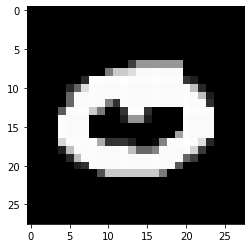

In [17]:
def drawing(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap="gray")
    
    
drawing(x_train[3])
print(y_train[3])
    
 
 

In [18]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))
def knn(X,Y,queryPoint,k=5):
    vals=[]
    m=X.shape[0]
    
    for i in range(m):
        d=dist(queryPoint,X[i])
        vals.append((d,Y[i]))
    vals=sorted(vals)
    vals=vals[:k]
    vals=np.array(vals)
    new_vals=np.unique(vals[:1],return_counts=True)
    
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    
    return pred

In [27]:
pred=knn(x_train,y_train,x_test[1])
print(int(pred))

6


6


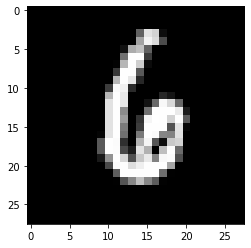

In [28]:
drawing(x_test[1])
print(y_test[1])